<a href="https://colab.research.google.com/github/JosselynChila/CNNProyecto/blob/main/CNNProyecto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import metrics


from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
import sys

In [2]:
data = pd.read_csv("water_potability.csv")
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
data['ph'].fillna(value=data['ph'].median(),inplace=True)
data['Sulfate'].fillna(value=data['Sulfate'].median(),inplace=True)
data['Trihalomethanes'].fillna(value=data['Trihalomethanes'].median(),inplace=True)

In [4]:
X = data.drop('Potability',axis=1).values
y = data['Potability'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109)

In [5]:
model = Sequential()
model.add(Conv1D(filters = 64, kernel_size = 2, activation = 'relu', input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.5))
model.add(Dense(units=32,activation="relu"))
model.add(Dropout(0.7))
model.add(Dense(units=32,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(
    optimizer="adam",
    loss='mse',
    metrics=["accuracy"]
)
# running the fitting
history = model.fit(X_train, y_train, epochs = 100, batch_size = 10, validation_data = (X_test, y_test), verbose = 2)


Epoch 1/100
230/230 - 2s - loss: 0.3567 - accuracy: 0.5902 - val_loss: 0.3320 - val_accuracy: 0.5785 - 2s/epoch - 9ms/step
Epoch 2/100
230/230 - 1s - loss: 0.3193 - accuracy: 0.6012 - val_loss: 0.2740 - val_accuracy: 0.5799 - 579ms/epoch - 3ms/step
Epoch 3/100
230/230 - 1s - loss: 0.2765 - accuracy: 0.6140 - val_loss: 0.2436 - val_accuracy: 0.5799 - 609ms/epoch - 3ms/step
Epoch 4/100
230/230 - 1s - loss: 0.2518 - accuracy: 0.6196 - val_loss: 0.2448 - val_accuracy: 0.5799 - 567ms/epoch - 2ms/step
Epoch 5/100
230/230 - 1s - loss: 0.2439 - accuracy: 0.6194 - val_loss: 0.2450 - val_accuracy: 0.5799 - 608ms/epoch - 3ms/step
Epoch 6/100
230/230 - 1s - loss: 0.2417 - accuracy: 0.6193 - val_loss: 0.2459 - val_accuracy: 0.5799 - 584ms/epoch - 3ms/step
Epoch 7/100
230/230 - 1s - loss: 0.2379 - accuracy: 0.6223 - val_loss: 0.2450 - val_accuracy: 0.5799 - 578ms/epoch - 3ms/step
Epoch 8/100
230/230 - 1s - loss: 0.2373 - accuracy: 0.6226 - val_loss: 0.2453 - val_accuracy: 0.5799 - 576ms/epoch - 3ms/

<Figure size 432x288 with 0 Axes>

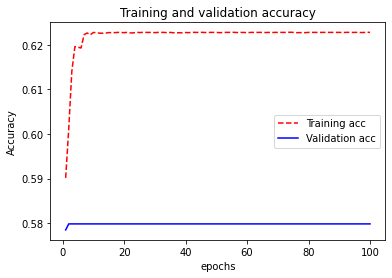

<Figure size 432x288 with 0 Axes>

In [6]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(1,len(acc)+1,1)

plt.plot ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')

plt.legend()
plt.figure()